# Airbnb data visualization

In [36]:
# Import all necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

## Questions:

1. Price comparison between Seattle and Boston
2. Price trend
3. Relation between price and various features in the dataset.
4. Prediction of price for a new listing

In [2]:
#Increasing the display rows to see more records for better understanding of data
pd.set_option('display.max_rows', 500)

In [3]:
df = pd.read_csv('Boston Seattle Airbnb data.csv')

In [4]:
df.shape

(2696255, 50)

In [5]:
df.head()

,listing_id,date,available,price_x,id,street,neighbourhood,neighbourhood_cleansed,city,state,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,calculated_host_listings_count,reviews_per_month
0,241032,2016-01-04,t,85.0,241032,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Seattle,WA,...,10.0,10.0,10.0,9.0,10.0,f,f,moderate,2,4.07
1,241032,2016-01-05,t,85.0,241032,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Seattle,WA,...,10.0,10.0,10.0,9.0,10.0,f,f,moderate,2,4.07
2,241032,2016-01-06,f,NaN,241032,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Seattle,WA,...,10.0,10.0,10.0,9.0,10.0,f,f,moderate,2,4.07
3,241032,2016-01-07,f,NaN,241032,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Seattle,WA,...,10.0,10.0,10.0,9.0,10.0,f,f,moderate,2,4.07
4,241032,2016-01-08,f,NaN,241032,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Seattle,WA,...,10.0,10.0,10.0,9.0,10.0,f,f,moderate,2,4.07


In [6]:
df.dtypes

listing_id                          int64
date                               object
available                          object
price_x                           float64
id                                  int64
street                             object
neighbourhood                      object
neighbourhood_cleansed             object
city                               object
state                              object
market                             object
smart_location                     object
country_code                       object
country                            object
property_type                      object
room_type                          object
accommodates                        int64
bathrooms                         float64
bedrooms                          float64
beds                              float64
bed_type                           object
square_feet                       float64
price_y                           float64
weekly_price                      

In [7]:
df['property_type'].value_counts()

Apartment          1572785
House               836580
Condominium         116800
Townhouse            62780
Loft                 28835
Bed & Breakfast      28470
Other                14235
Cabin                 7665
Boat                  7300
Camper/RV             5110
Bungalow              4745
Villa                 2190
Tent                  1825
Entire Floor          1460
Dorm                  1460
Treehouse             1095
Chalet                 730
Guesthouse             365
Yurt                   365
Name: property_type, dtype: int64

In [8]:
np.sum(df.isnull())/df.shape[0]

listing_id                        0.000000
date                              0.000000
available                         0.000000
price_x                           0.416032
id                                0.000000
street                            0.000000
neighbourhood                     0.129823
neighbourhood_cleansed            0.000000
city                              0.000271
state                             0.000000
market                            0.000000
smart_location                    0.000000
country_code                      0.000000
country                           0.000000
property_type                     0.000541
room_type                         0.000000
accommodates                      0.000000
bathrooms                         0.004061
bedrooms                          0.002166
beds                              0.001354
bed_type                          0.000000
square_feet                       0.979288
price_y                           0.000000
weekly_pric

In [9]:
df.describe()

,listing_id,price_x,id,accommodates,bathrooms,bedrooms,beds,square_feet,price_y,weekly_price,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
count,2.696255e+06,1.574527e+06,2.696255e+06,2.696255e+06,2.685305e+06,2.690415e+06,2.692605e+06,55845.000000,2.696255e+06,1.058865e+06,...,2.696255e+06,2.166275e+06,2.158610e+06,2.162260e+06,2.159705e+06,2.162990e+06,2.160070e+06,2.160070e+06,2.696255e+06,2.194380e+06
mean,6.937223e+06,1.625769e+02,6.937223e+06,3.199810e+00,1.240995e+00,1.282051e+00,1.674258e+00,856.026144,1.501754e+02,8.296567e+02,...,2.072397e+01,9.331205e+01,9.540920e+00,9.416948e+00,9.720973e+00,9.733378e+00,9.517742e+00,9.319365e+00,7.700149e+00,2.028059e+00
std,4.045256e+06,1.438058e+02,4.045256e+06,1.890644e+00,5.495332e-01,8.236612e-01,1.081863e+00,645.076962,1.240781e+02,5.769636e+02,...,3.675980e+01,8.207937e+00,8.218564e-01,9.991675e-01,6.825189e-01,6.568442e-01,7.755601e-01,8.929148e-01,2.148584e+01,1.968461e+00
min,3.335000e+03,1.000000e+01,3.335000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000e+01,8.000000e+01,...,0.000000e+00,2.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,1.000000e-02
25%,3.852117e+06,7.900000e+01,3.852117e+06,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,420.000000,7.900000e+01,4.580000e+02,...,1.000000e+00,9.100000e+01,9.000000e+00,9.000000e+00,1.000000e+01,1.000000e+01,9.000000e+00,9.000000e+00,1.000000e+00,5.900000e-01
50%,7.021906e+06,1.200000e+02,7.021906e+06,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,770.000000,1.200000e+02,6.600000e+02,...,7.000000e+00,9.600000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,9.000000e+00,1.000000e+00,1.370000e+00
75%,9.492873e+06,2.000000e+02,9.492873e+06,4.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,1200.000000,1.900000e+02,1.000000e+03,...,2.400000e+01,9.900000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,3.000000e+00,2.890000e+00
max,1.493346e+07,7.163000e+03,1.493346e+07,1.600000e+01,8.000000e+00,7.000000e+00,1.600000e+01,3000.000000,4.000000e+03,6.300000e+03,...,4.740000e+02,1.000000e+02,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.360000e+02,1.915000e+01


## 1. Price comparison

C:\Users\vijay\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3325: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


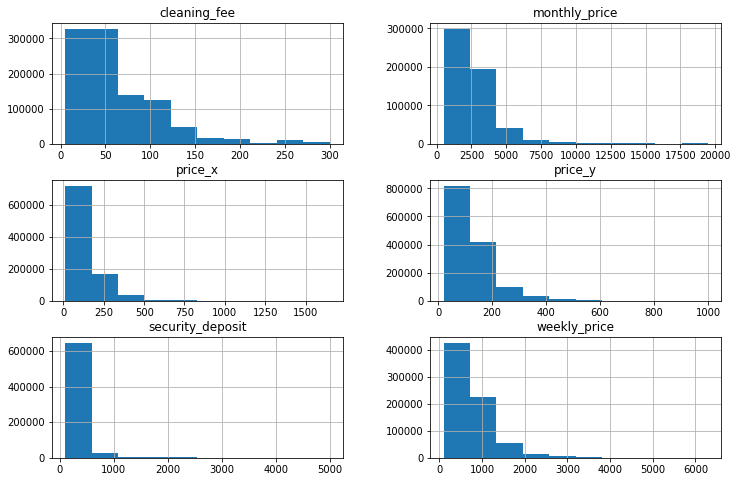

In [31]:
#Seattle Price analysis
price_df = df[['price_x', 'price_y', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee','market' ]].copy()
fig = plt.figure(figsize=(12,8),facecolor='white',edgecolor='blue')
ax = fig.gca()
price_df[price_df['market'] == 'Seattle'].hist(ax = ax);

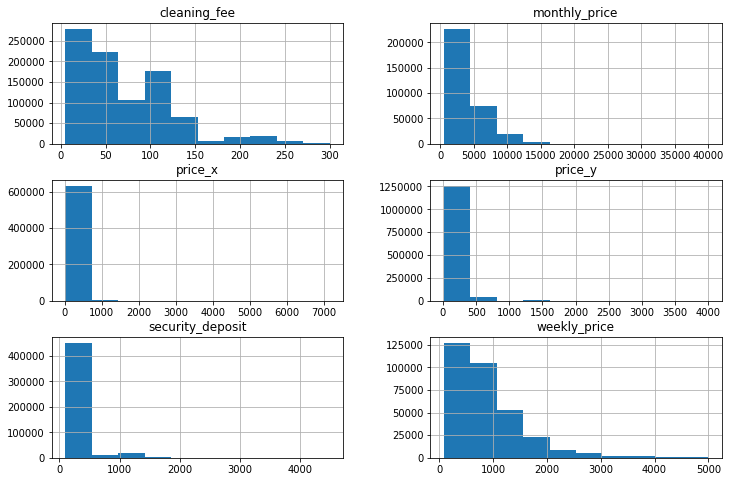

In [32]:
#Boston Price Analysis
price_df = df[['price_x', 'price_y', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee','market' ]].copy()
fig = plt.figure(figsize=(12,8),facecolor='white',edgecolor='blue')
ax = fig.gca()
price_df[price_df['market'] == 'Boston'].hist(ax = ax);

Above analysis shows comparison of various prices and fees.
1. Cleaning fee, monthly price, weekly price and security deposit seems to be higher in Seattle.
2. price x seems to be same in both the regions we will analyze price x in detail.

## 2. Price Trend

In [21]:
trend_df = df[['date', 'market', 'price_x', 'price_y', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee' ]]

In [22]:
trend_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2696255 entries, 0 to 2696254
Data columns (total 8 columns):
date                object
market              object
price_x             float64
price_y             float64
weekly_price        float64
monthly_price       float64
security_deposit    float64
cleaning_fee        float64
dtypes: float64(6), object(2)
memory usage: 164.6+ MB


In [23]:
trend_df['date']= pd.to_datetime(trend_df['date'])

C:\Users\vijay\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
trend_df['month_year'] = pd.to_datetime(trend_df['date']).dt.to_period('M')

C:\Users\vijay\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Price Trend')

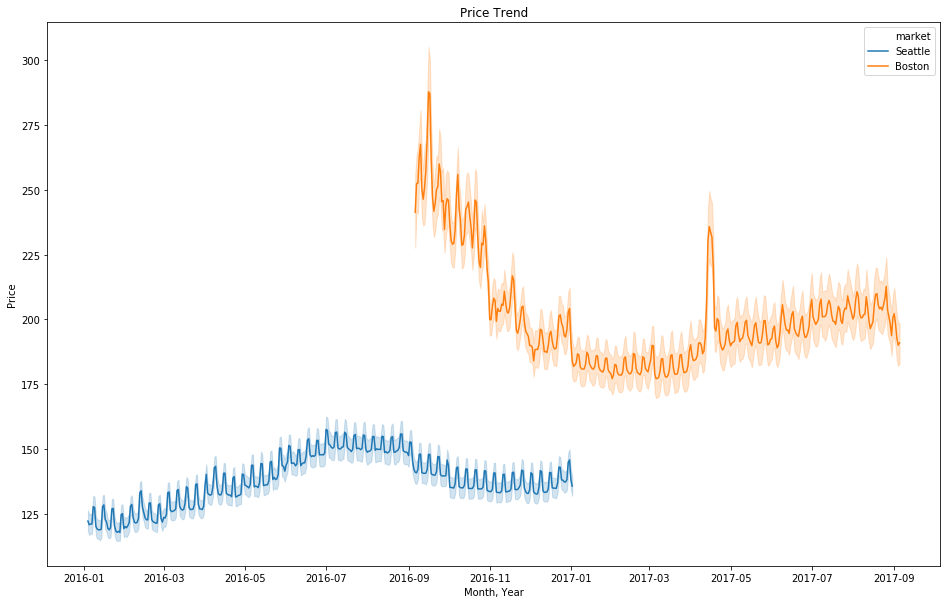

In [38]:
plt.figure(figsize=(16,10))
pl = sns.lineplot(x = 'date', y = 'price_x', data = trend_df, hue = 'market')
pl.set(xlabel = 'Month, Year', ylabel = 'Price')
pl.set_title('Price Trend')

Trend chart shows Boston prices decreases a bit over time whereas Seattle property prices were increasing over time.
Overall we could see Boston property average prices are significantly higher when compared to the Seattle.

## 3. Correlation between variables

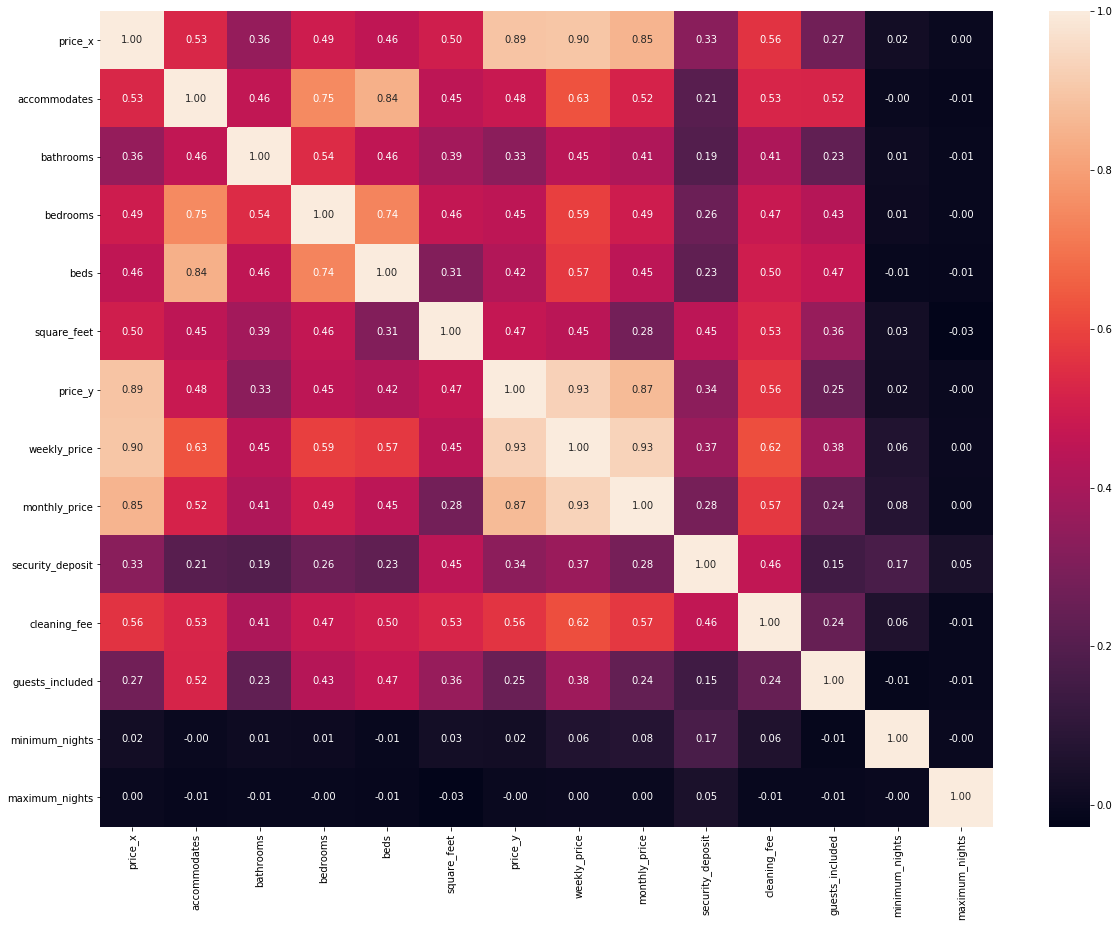

In [35]:
#Corelation between variables
corr_df = df.drop(columns = ['listing_id', 'id', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 
                             'calculated_host_listings_count', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',  
                             'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 
                             'review_scores_value', 'reviews_per_month'   ])
plt.figure(figsize=(20,15))
sns.heatmap(corr_df.corr(), annot=True, fmt=".2f");

From this visual we can clearly see price is highly correlated with the number of different rooms and property size.

## 4. Price prediction

In [14]:
#square_feet column does not have values for most of the records. almost 90 %. So dropping it.
data = df.drop(columns = ['square_feet'])

In [15]:
#Dropping some columns that are not required for prediction analysis
data.drop(columns = ['date', 'available', 'street', 'extra_people', 'calendar_last_scraped'], inplace = True)

In [16]:
# dropping any nan records
data.dropna(how = 'any', inplace = True)

In [17]:
df.shape

(2696255, 50)

In [18]:
data.shape

(221953, 44)

We have dropped 2474302 records which has NAN

In [19]:
#To analyze object fields
obj_df = data.select_dtypes(include=['object']).copy()
obj_df.head(3)

,neighbourhood,neighbourhood_cleansed,city,state,market,smart_location,country_code,country,property_type,room_type,bed_type,calendar_updated,requires_license,instant_bookable,cancellation_policy
365,Queen Anne,West Queen Anne,Seattle,WA,Seattle,"Seattle, WA",US,United States,Apartment,Entire home/apt,Real Bed,today,f,f,strict
366,Queen Anne,West Queen Anne,Seattle,WA,Seattle,"Seattle, WA",US,United States,Apartment,Entire home/apt,Real Bed,today,f,f,strict
370,Queen Anne,West Queen Anne,Seattle,WA,Seattle,"Seattle, WA",US,United States,Apartment,Entire home/apt,Real Bed,today,f,f,strict


In [21]:
#Create a copy of the dataframe
cat_df_copy = obj_df.copy()
#Pull a list of the column names of the categorical variables
cat_cols_lst = cat_df_copy.columns

def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue

    return df

In [22]:
df_new = create_dummy_df(data, cat_cols_lst, dummy_na=False)

In [24]:
df_new.dtypes

listing_id                                            int64
price_x                                             float64
id                                                    int64
accommodates                                          int64
bathrooms                                           float64
bedrooms                                            float64
beds                                                float64
price_y                                             float64
weekly_price                                        float64
monthly_price                                       float64
security_deposit                                    float64
cleaning_fee                                        float64
guests_included                                       int64
minimum_nights                                        int64
maximum_nights                                        int64
availability_30                                       int64
availability_60                         

In [27]:
X = df_new.drop('price_x', axis=1)
y = df_new['price_x']
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)
    
lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
    
   #Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)
   #Score using your model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)


In [28]:
#Print training and testing score
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

The rsquared on the training data was 0.8951632974835245.  The rsquared on the test data was 0.8920663847715664.


In [29]:
#Dropping other price fields to predict only price_x

X = X.drop(columns = ['price_y', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee'], axis = 1)
y = df_new['price_x']
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)
    
lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
    
   #Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)
   #Score using your model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

In [30]:
#Print training and testing score
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

The rsquared on the training data was 0.7372470275995986.  The rsquared on the test data was 0.7337301882311034.


## Conclusion:
From above analysis we infer
1. Cleaning fee, monthly price, weekly price and security deposit seems to be higher in Seattle.
2. price seems to be decreasing over time in Boston whereas it increases over time in Seattle.
3. property features and facilities do have bigger impact in its price.
4. by creating a linear regression model we were able to predict the scores with approximately same score between the test and train data set.